In [1]:
import os
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import cv2
import numpy as np

from tensorflow import keras
from keras import layers
from keras import models
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import img_to_array, load_img

In [2]:
labels = {
        0: 'badminton',
        1: 'baseball',
        2: 'basketball',
        3: 'boxing',
        4: 'chess',
        5: 'cricket',
        6: 'fencing',
        7: 'football',
        8: 'formula1',
        9: 'gymnastics',
        10: 'hockey',
        11: 'ice_hockey',
        12: 'kabaddi',
        13: 'motogp',
        14: 'shooting',
        15: 'swimming',
        16: 'table_tennis',
        17: 'tennis',
        18: 'volleyball',
        19: 'weight_lifting',
        20: 'wrestling',
        21: 'wwe'
    }

In [3]:
#Data paths
DATA_DIR = 'C:/Users/Arun/Downloads/rajesh/input/data'
DATA_CSV = 'C:/Users/Arun/Downloads/rajesh/input/data.csv'

#Reading csv
df = pd.read_csv(DATA_CSV)
print(df.head(5), "\n")
print("Shape: \t", df.shape)
print("Number of different classes: ", len(df['target'].unique()))


                                image_path  target
0    ../input/data/gymnastics/00000774.jpg     9.0
1  ../input/data/table_tennis/00000702.jpg    16.0
2       ../input/data/fencing/00000275.jpg     6.0
3      ../input/data/baseball/00000380.jpg     1.0
4       ../input/data/cricket/00000303.jpg     5.0 

Shape: 	 (13800, 2)
Number of different classes:  22


In [4]:
# IMAGES PREPROCESSING
train_imgs = df['image_path'].tolist()
train_labels = df['target'].tolist()

In [ ]:
for i in range(len(train_imgs)):
  train_imgs[i]='/content/drive/MyDrive/'+train_imgs[i][3:]

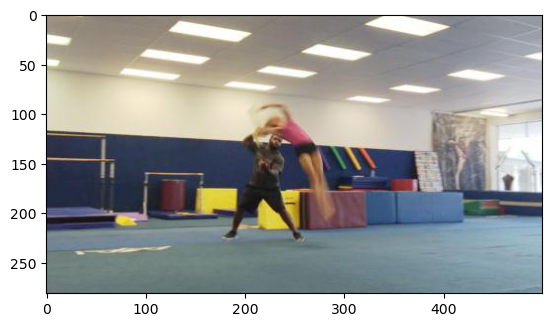

In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('../input/data/gymnastics/00000702.jpg')
imgplot = plt.imshow(img)
plt.show()

In [6]:
def read_and_process_image(list_of_images, list_of_labels, numclasses=22):
  """
  X = array of images
  Y = array of labels
  """

  X = []
  Y = []

  # X filling
  counter = 0
  for image in list_of_images:

    X.append(cv2.resize(cv2.imread(image, cv2.IMREAD_COLOR), (128,128), interpolation=cv2.INTER_CUBIC))
    if counter %1000 ==0:
      print(counter)
    counter +=1


  # Y filling
  for label in list_of_labels:

    # each row will have a list of length=22 with 1 or 0 in each position depending on label value
    temp_labels = []
    for i in range(22):

        if label == i:
            temp_labels.append(1)

        else:
            temp_labels.append(0)

    Y.append(temp_labels)

  return X, Y

In [7]:

X, Y = read_and_process_image(train_imgs, train_labels)

X = np.array(X)
Y = np.array(Y)

print('Shape of image is: {}'.format(X.shape))
print('Shape of labels is: {}'.format(Y.shape))

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
Shape of image is: (13800, 128, 128, 3)
Shape of labels is: (13800, 22)


In [8]:

from sklearn.model_selection import train_test_split
X_train, X_s, Y_train, Y_s = train_test_split( X, Y, test_size=0.3, random_state=11)
X_test, X_val, Y_test, Y_val = train_test_split( X_s, Y_s, test_size=0.5, random_state=11)

In [9]:
train_length = X_train.shape[0]
validation_length = X_val.shape[0]


In [10]:
base_model = tf.keras.applications.ResNet50V2(
    include_top=False,
    weights="imagenet",
    input_shape=(128,128,3),
    pooling=None,
    classifier_activation="softmax",
)

In [12]:
base_model.trainable = True

In [13]:
print("Number of layers in the base model: ", len(base_model.layers))

# Fine-tuning from this layer onwards
fine_tune_start = 150

# Freeze all the layers before
for layer in base_model.layers[:fine_tune_start]:
  layer.trainable = False

Number of layers in the base model:  190


In [14]:
base_model.summary()

Model: "resnet50v2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 128, 128, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 134, 134, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 64, 64, 64)           9472      ['conv1_pad[0][0]']           
                                                                                                  
 pool1_pad (ZeroPadding2D)   (None, 66, 66, 64)           0         ['conv1_conv[0][0]']          
                                                                                         

 tchNormalization)                                                                                
                                                                                                  
 conv2_block3_preact_relu (  (None, 32, 32, 256)          0         ['conv2_block3_preact_bn[0][0]
 Activation)                                                        ']                            
                                                                                                  
 conv2_block3_1_conv (Conv2  (None, 32, 32, 64)           16384     ['conv2_block3_preact_relu[0][
 D)                                                                 0]']                          
                                                                                                  
 conv2_block3_1_bn (BatchNo  (None, 32, 32, 64)           256       ['conv2_block3_1_conv[0][0]'] 
 rmalization)                                                                                     
          

 conv3_block2_1_relu (Activ  (None, 16, 16, 128)          0         ['conv3_block2_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv3_block2_2_pad (ZeroPa  (None, 18, 18, 128)          0         ['conv3_block2_1_relu[0][0]'] 
 dding2D)                                                                                         
                                                                                                  
 conv3_block2_2_conv (Conv2  (None, 16, 16, 128)          147456    ['conv3_block2_2_pad[0][0]']  
 D)                                                                                               
                                                                                                  
 conv3_block2_2_bn (BatchNo  (None, 16, 16, 128)          512       ['conv3_block2_2_conv[0][0]'] 
 rmalizati

                                                                                                  
 conv3_block4_3_conv (Conv2  (None, 8, 8, 512)            66048     ['conv3_block4_2_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv3_block4_out (Add)      (None, 8, 8, 512)            0         ['max_pooling2d_1[0][0]',     
                                                                     'conv3_block4_3_conv[0][0]'] 
                                                                                                  
 conv4_block1_preact_bn (Ba  (None, 8, 8, 512)            2048      ['conv3_block4_out[0][0]']    
 tchNormalization)                                                                                
                                                                                                  
 conv4_blo

 D)                                                                 0]']                          
                                                                                                  
 conv4_block3_1_bn (BatchNo  (None, 8, 8, 256)            1024      ['conv4_block3_1_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_block3_1_relu (Activ  (None, 8, 8, 256)            0         ['conv4_block3_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv4_block3_2_pad (ZeroPa  (None, 10, 10, 256)          0         ['conv4_block3_1_relu[0][0]'] 
 dding2D)                                                                                         
          

 conv4_block5_2_relu (Activ  (None, 8, 8, 256)            0         ['conv4_block5_2_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv4_block5_3_conv (Conv2  (None, 8, 8, 1024)           263168    ['conv4_block5_2_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv4_block5_out (Add)      (None, 8, 8, 1024)           0         ['conv4_block4_out[0][0]',    
                                                                     'conv4_block5_3_conv[0][0]'] 
                                                                                                  
 conv4_block6_preact_bn (Ba  (None, 8, 8, 1024)           4096      ['conv4_block5_out[0][0]']    
 tchNormal

                                                                                                  
 conv5_block2_preact_relu (  (None, 4, 4, 2048)           0         ['conv5_block2_preact_bn[0][0]
 Activation)                                                        ']                            
                                                                                                  
 conv5_block2_1_conv (Conv2  (None, 4, 4, 512)            1048576   ['conv5_block2_preact_relu[0][
 D)                                                                 0]']                          
                                                                                                  
 conv5_block2_1_bn (BatchNo  (None, 4, 4, 512)            2048      ['conv5_block2_1_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv5_blo

In [15]:
global_average_layer = layers.GlobalAveragePooling2D()

In [16]:
model = models.Sequential()
model.add(base_model)
model.add(global_average_layer)
model.add(layers.Dropout(0.2))

# Classification Layers
model.add(layers.Dense(1024,activation='relu'))
model.add(layers.Dense(1024,activation='relu'))
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(22,activation='softmax'))

In [17]:
from keras.optimizers import SGD
opt = SGD(lr=4e-2)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['acc'])

In [18]:
train_datagen = ImageDataGenerator(rescale=1./255,          #Scale the image between 0 and 1

                                    #Data Augmentation, applied as random transformations
                                    rotation_range=40,      
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True,)
val_datagen = ImageDataGenerator(rescale=1./255)    

In [19]:
train_generator = train_datagen.flow(X_train, Y_train, batch_size=100)
val_generator = val_datagen.flow(X_val, Y_val, batch_size=100)

In [20]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5, restore_best_weights=True)

history = model.fit(train_generator,
                    steps_per_epoch = train_length//100,       #how many images will be processed before gradient
                    epochs = 20,                                  #full-pass through data
                    validation_data = val_generator,                  
                    validation_steps = validation_length//100, 
                    callbacks=[callback])
     

Epoch 1/20
96/96 [==============================] - 252s 3s/step - loss: 2.9484 - acc: 0.1333 - val_loss: 2.5644 - val_acc: 0.2605
Epoch 2/20
96/96 [==============================] - 250s 3s/step - loss: 2.4614 - acc: 0.3099 - val_loss: 2.0504 - val_acc: 0.4015
Epoch 3/20
96/96 [==============================] - 248s 3s/step - loss: 1.9802 - acc: 0.4367 - val_loss: 1.6250 - val_acc: 0.5225
Epoch 4/20
96/96 [==============================] - 250s 3s/step - loss: 1.6478 - acc: 0.5182 - val_loss: 1.4331 - val_acc: 0.5725
Epoch 5/20
96/96 [==============================] - 251s 3s/step - loss: 1.4545 - acc: 0.5667 - val_loss: 1.2903 - val_acc: 0.6110
Epoch 6/20
96/96 [==============================] - 274s 3s/step - loss: 1.3121 - acc: 0.6063 - val_loss: 1.1762 - val_acc: 0.6455
Epoch 7/20
96/96 [==============================] - 247s 3s/step - loss: 1.1993 - acc: 0.6379 - val_loss: 1.1296 - val_acc: 0.6555
Epoch 8/20
96/96 [==============================] - 307s 3s/step - loss: 1.0892 - a

In [22]:

model.save('C:/Users/Arun/Downloads/rajesh/input/my_model.h5')

C:\Users\Arun\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [23]:
model = tf.keras.models.load_model('C:/Users/Arun/Downloads/rajesh/input/my_model.h5')

# Check its architecture
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50v2 (Functional)     (None, 4, 4, 2048)        23564800  
                                                                 
 global_average_pooling2d (  (None, 2048)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 1024)              2098176   
                                                                 
 dense_1 (Dense)             (None, 1024)              1049600   
                                                                 
 dense_2 (Dense)             (None, 512)               524800    
                                                        

In [24]:
batch_size = 100
test_generator = val_datagen.flow(X_test, Y_test, batch_size=batch_size)
     

In [25]:
loss, accuracy = model.evaluate(test_generator)
print('Test accuracy :', accuracy)

21/21 [==============================] - 24s 1s/step - loss: 0.8438 - acc: 0.7681
Test accuracy : 0.7681159377098083


In [26]:
x = np.array(X_test)

test_datagen = ImageDataGenerator(rescale=1./255)

1/1 [==============================] - 0s 62ms/step


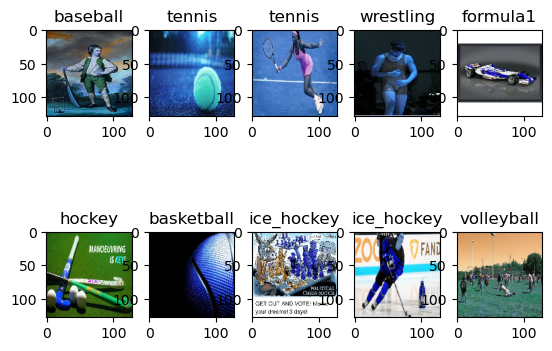

In [27]:
i = 0
text_labels = []

for batch in test_datagen.flow(x, batch_size=1):
  pred = model.predict(batch)
  text_labels.append(labels[np.argmax(pred)])

  plt.subplot(int(5/5)+1, 5, i+1)
  plt.title(text_labels[i])
  imgplot = plt.imshow(batch[0])
  i += 1
  if i%10==0:
    break
    
plt.show()